In [1]:
# import torch

# # Model
# #model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', device='cpu')  # load on CPU

# # Image
# img = 'https://ultralytics.com/images/zidane.jpg'

# # Inference
# results = model(img)

In [2]:
#results.pandas().xyxy[0]

#  Inference YOLOv5 Using PyTorch Hub

In [3]:
import pandas as pd

df = pd.read_csv('/home/kannika/file/USAIFanDetect_custom_test.csv') 
print(df.shape)
df.head()

(100, 20)


,Unnamed: 0,Unnamed: 0.1,img_path,tagName,originalImage,Rleft,Rtop,Rwidth,Rheight,fileName,shape_0,shape_1,left,top,width,height,xmin,ymin,xmax,ymax
0,0,0,/media/tohn/SSD/FanDetect_custom/test/FanDetec...,Fan,https://irisprodseatraining.blob.core.windows....,0.180000,0.137734,0.691250,0.640000,FanDetect_custom_359.jpg,600,800,144.000000,82.640622,553.0000,384.00000,144.000000,82.640622,697.000000,466.640622
1,1,1,/media/tohn/SSD/FanDetect_custom/test/FanDetec...,Fan,https://irisprodseatraining.blob.core.windows....,0.178750,0.129401,0.646250,0.645000,FanDetect_custom_360.jpg,600,800,143.000000,77.640624,517.0000,387.00000,143.000000,77.640624,660.000000,464.640624
2,2,2,/media/tohn/SSD/FanDetect_custom/test/FanDetec...,Fan,https://irisprodseatraining.blob.core.windows....,0.202500,0.141068,0.597500,0.640000,FanDetect_custom_361.jpg,600,800,162.000000,84.640626,478.0000,384.00000,162.000000,84.640626,640.000000,468.640626
3,3,3,/media/tohn/SSD/FanDetect_custom/test/FanDetec...,Fan,https://irisprodseatraining.blob.core.windows....,0.184231,0.134323,0.645433,0.658389,FanDetect_custom_362.jpg,600,800,147.384464,80.593542,516.3468,395.03352,147.384464,80.593542,663.731264,475.627062
4,4,4,/media/tohn/SSD/FanDetect_custom/test/FanDetec...,Fan,https://irisprodseatraining.blob.core.windows....,0.205000,0.137734,0.603750,0.645000,FanDetect_custom_363.jpg,600,800,164.000000,82.640622,483.0000,387.00000,164.000000,82.640622,647.000000,469.640622


In [19]:
import torch

#model = torch.hub.load('ultralytics/yolov5', 'custom', path='path/to/best.pt')  # local model
model = torch.hub.load('/home/kannika/yolov5', 'custom', path='/media/tohn/SSD/YOLOv5/model/USAI/FanDetect/exp/weights/Modelyolo5_FanDetect.pt', source='local', device='cpu')  # local repo

model.conf = 0.50  # NMS confidence threshold
model.iou = 0.50  # NMS IoU threshold
model.classes = None   # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image
#.cpu()  # CPU

# Image
imgs = df['img_path'][50]

# Inference
results = model(imgs, size=640)  # custom inference size
pred = results.pandas().xyxy[0].sort_values('confidence')
pred

YOLOv5 🚀 v6.0-108-g53349da torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,170.970398,83.445564,638.853821,467.844849,0.867632,0,Fan


<function matplotlib.pyplot.show(*, block=None)>

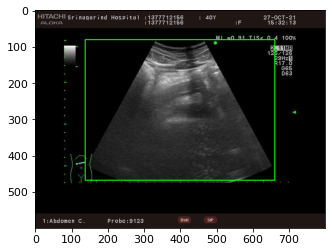

In [23]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt

#res1 = df[df['fileName'] == 'FanDetect_custom_407.jpg'].reset_index(drop=True)

#fig 1
img_path1 = df['img_path'][50]
#Image(filename=img_path, width=800)
img_c1 = cv2.imread(img_path1)
#plt.imshow(img_c)
xmin1 = int(df['xmin'][50])
ymin1 = int(df['ymin'][50])
xmax1 = int(df['xmax'][50])
ymax1 = int(df['ymax'][50])
image = cv2.rectangle(img_c1, (xmin1, ymin1), (xmax1, ymax1), (0,255,0), 2)

plt.imshow(image)
plt.show

In [24]:
# xmin_pre = int((180.839005/640)*image.shape[1])
# ymin_pre = int((81.428909/640)*image.shape[0])
# xmax_pre = int((626.30426/640)*image.shape[1])
# ymax_pre = int((466.075287/640)*image.shape[0])

xmin_pre = int(pred['xmin'][0])
ymin_pre = int(pred['ymin'][0])
xmax_pre = int(pred['xmax'][0])
ymax_pre = int(pred['ymax'][0])

Prediction Confidence : 0.8676322102546692



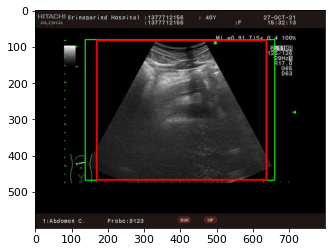

In [25]:
print(f"Prediction Confidence : {pred['confidence'][0]}\n")

image2 = cv2.rectangle(image, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255,0,0), 4)
plt.imshow(image2)

In [4]:
print('-'*50)

--------------------------------------------------
